# Using Fashion_MNIST dataset to build an image classification model with 10 classes, through 2 models using tensorflow 2.0
Deep learning model and CNN model for 5 epochs and calculating accuracies by both models

In [1]:
import tensorflow as tf
# gpus = tf.config.experimental.list_physical_devices('GPU')
# tf.config.experimental.set_memory_growth(gpus[0], True)
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout 

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
data= keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels)= data.load_data()

class_names= ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

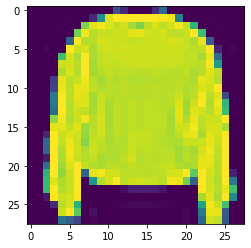

In [4]:
plt.imshow(train_images[7])
plt.show()

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
# 60,000 images, each image is 28*28 with rgb pixel values till range 255(black). 
train_images[7]

array([[  0,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,  63,  28,
          0,   0,   0,  33,  85,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   2,   0,   0,  28, 126, 241, 255, 255,
        255, 255, 255, 255, 252, 248, 111,   0,   0,   0,   2,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2,   0,   0, 206, 244, 251, 241, 230, 238,
        221, 205, 230, 240, 230, 239, 251, 233, 165,   0,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 199, 251, 228, 234, 233, 236, 235,
        245, 247, 237, 234, 239, 230, 230, 235, 255, 176,   0,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  81, 254, 226, 228, 239, 237, 236, 234,
        232, 233, 235, 235, 236, 239, 237, 233, 225, 246,  73,   0,   0,
          0,   0],
       [  0,   0,   3,   0,   0, 255, 235, 239, 223, 234, 238, 236, 237,
        236, 235, 235, 235, 235, 236, 235, 234, 230, 231, 255,  24,   0,
          4,   0],
       [  

In [7]:
# normalize the data to be within 0-1 range
train_images= train_images/255.0
test_images= test_images/255.0

In [8]:
train_images[7]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.00392157, 0.        , 0.        , 0.        ,
        0.        , 0.24705882, 0.10980392, 0.        , 0.        ,
        0.        , 0.12941176, 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00784314, 0.        , 0.        , 0.10980392, 0.49411765,
        0.94509804, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.98823529, 0.97254902, 0.43529412,
        0.        , 0.        , 0.        , 0.00784314, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.00784314,
        0.        , 0.        , 0.80784314, 0.95686275, 0.98431373,
        0.94509804, 0.90196078, 0.93333333, 0.86666667, 0.80392157,
        0.90196078, 0.9411

In [9]:
train_labels[7]

2

# Building the model

Flatten the data to get 28*28= 784 inputs and for output we can have one node for each class, thus 10 outputs, each giving the prob using softmax. The one with highest prob is the predicted class. One hidden layer with 128 neurons

In [11]:
model= keras.Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation= 'softmax')
])
# use sparse_categorical as it accepts integer targets and internally converts to binary target classes, we can also use categorical cross-entropy but first conver labels to categorical data
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history= model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.4958 - accuracy: 0.8271
Epoch 2/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3733 - accuracy: 0.8655
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3334 - accuracy: 0.8790
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3090 - accuracy: 0.8871
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.2927 - accuracy: 0.8923


In [12]:
#evaluate on test data
test_loss, test_acc= model.evaluate(test_images, test_labels)
print("Test accuracy", test_acc)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.3467 - accuracy: 0.8755
Test accuracy 0.8755


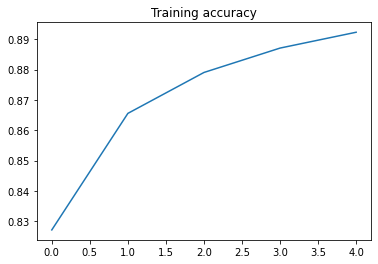

In [13]:
plt.plot(range(5), history.history['accuracy'])
plt.title('Training accuracy')
plt.show()

# CNN model for fashion_MNIST data

In [14]:
# we need to reshape the data to add channel information: (28, 28, 1)
train_images= train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images= test_images.reshape(test_images.shape[0], 28, 28, 1)

In [15]:
# y_train = keras.utils.to_categorical(y_train, 10)
# y_test = keras.utils.to_categorical(y_test, 10)

model_cnn = keras.Sequential([
            Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
            Conv2D(64, (5, 5), activation='relu'),
            MaxPool2D(pool_size=(2, 2)),
            Flatten(),
            Dropout(0.5),
            Dense(128, activation='relu'),
            Dropout(0.5),
            Dense(10, activation='softmax')          
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn= model_cnn.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 177us/sample - loss: 0.5102 - accuracy: 0.8174
Epoch 2/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.3557 - accuracy: 0.8708
Epoch 3/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.3185 - accuracy: 0.8839
Epoch 4/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.2930 - accuracy: 0.8922
Epoch 5/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.2717 - accuracy: 0.9003


In [16]:
loss, accuracy= model_cnn.evaluate(test_images, test_labels)
print('test accuracy for cnn model:', accuracy)

10000/10000 [==============================] - 1s 103us/sample - loss: 0.2569 - accuracy: 0.9072
test accuracy for cnn model: 0.9072


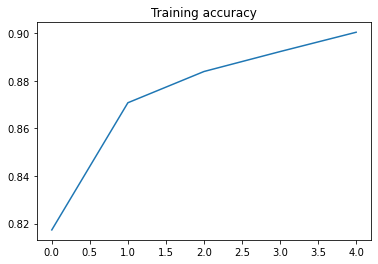

In [17]:
plt.plot(range(5), history_cnn.history['accuracy'])
plt.title('Training accuracy')
plt.show()